<a href="https://colab.research.google.com/github/AdrianUrbanski/DL/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

**Submission deadlines:**
- get at least 4 points by Tuesday, 11.05.2021
- remaining points: last lab session before or on Tuesday, 18.05.2021

**Points:** Aim to get 12 out of 15+ possible points


## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problem 1: Word Embeddings [4p]

Many natural language processing tasks requrie continuous representations for words.
[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are mappings from a discrete
space to real-valued vectors. Word embeddings might be trained with neural networks,
either as a by-product of other tasks (e.g., language modeling, neural machine translation),
or with networks designed specifically for the word embedding task.

Two problems associated with training neural word embeddings are related to the speed of training:
(a) large volume of data, on which the network has to be trained on, and (b) time required to compute
output probability distribution over large vocabularities.

One of the most popular architectures for training word embeddings is called Word2vec [[1]()], [[2]()]. It builds on the idea that semantics of a word can be defined through the contexts,
in which the word appears in the sentence.

Let $w_1, w_2,\ldots,w_N$ be an $N$-word sentence in a natural language.
We define a context of a word $w_l$ a list of $n$ preceeding and following words
$w_{l-n},\ldots,w_{l-1},w_{l+1},\dots,w_{l+n}$.

The underlying assumption is that similar words appear in similar contexts.
For instance, words *Poland* and *Monaco* are similar in a sense, that they are singular nouns
describing abstract concepts of existing, european countries.
We can convince ourselves by looking at exceprts from Wikipedia articles
on Poland and Monaco:

* Despite **Monaco's independence** and separate foreign policy
* aimed to preserve **Poland's independence** and the szlachta's

* **Monaco joined the** Council of Europe in 2004
* **Poland joined the** Schengen Area in 2007

* nearly one-fifth **of Poland's population** – half of them
* Christians comprise a total of 83.2% **of Monaco's population**.

### Tasks
You will use word vectors pre-computed on a large dataset.
1. **[1p]** It has been observed, that word embeddings allow to perform semantic arithmetic where, for instance

    **king** - **man** + **woman** ~= **queen**

    This *analogy* task is often used as a quality measure of word embeddings. Load word embeddings and compute
    their analogy score on a dataset of analogous pairs, expressed as an accuracy of accuracy of predicting a pair
    item (**queen** in the example above). Specifically, compare `FastText` and `Word2vec` word embeddings.
    
2. **[1p]** Word embedding capture approximate semantics. Under an assumption that words of similar semantics
    exist in different languages, a mapping $W: \mathbb{R}^{300}\mapsto\mathbb{R}^{300}$ might be constructed that
    translates word embeddings between languages. It has been shown that such ortonormal mappings allow to express
    approximate, bilingual dictionaries. In addition, non-linear mappings do not offer additional benefits.

    Given a simple English-Polish dictionary of word pairs (sourced from Wikitionary)
    find an orthonormal mapping $W$ between English and Polish `FastText`
    word embeddings using Procrustes analysis.

3. **[1p]** Word embeddings can often be nicely visualized.
    Make a 2-D `PCA` plot of word embeddings for countries and their capital cities
    for `FastText` or `Word2vec`. Connect each country with its capital city with a line segment.
    Can you see any regularities?
    
4. **[1p]** Plot 400 roughly most frequent words' embeddings (either `FastText` or `Word2vec`) in 2-D with `PCA`.
    Skip stop words, punctuations, artifact words, etc. You can be imprecise and use heuristics
    (e.g., select words than are at lest 3 charactes long).
    Can you see any regularities? Another method of making meaningful visualizations is `t-SNE`.
    
    Make another 2-D visualization, this time using `t-SNE`. Visualizations with `t-SNE` are obtained
    with gradient descent. Try to tweak optimization parameters to get lower optimization error,
    than the one with default parameters.
    Can you see any regularities this time?

# Problem 2: kNN Talker [11p+]

In this exercise you will build a simple chatbot that uses distributed representations of words and sentences to perform a nearest neighbor selection of responses.

We have collected two sets of data:
- `./reddit_pairs.txt` of excerpts of [Reddit](https://www.reddit.com/) conversations,
- `./hackernews_pairs.txt` of excertps from [Hackernews](https://news.ycombinator.com/).

The two corpuses are formatted as `tab`-separated pairs of utterances: a `prompt` and a `response`. Successive lines belong to different conversations.

The main idea of the chatbot is to build a representation of the user `input` and of all `prompts` from the corpus. Then select the best (or randomly one of the top few) matches and print the associated `response`.

The key to get the bot working is to create good sentence representations. We will try:
- averaging word embeddings
- using sentence models such as BERT.

### Warning:
The Reddit corpus may contain abusive language, it was not heavily cleaned.

### Tasks
The code below is a starting point, but you can develop you own. The following list suggests some actions to try, along with the points that reflect our subjective hardness. The exercise is worth 6 regular points (i.e. the report, word embedding-based model and BERT-based model), anything on top of it will be counted as a bonus.

1. [2p] Type in a Markdown cell a report of your actions, what did you try, why, what was the result. Show exemplary conversations (they must be probable under your model). Cherry-pick 3 nice dialogues.
2. [2p] Represent sentences by averaging their word vectors. Properly handle tokenization (you can use regular expressions or e.g. `nltk` library). Describe how you handle lower and upper cased words. Try a few nearest neighbor selection methods (such as euclidean or cosine distance). See how embedding normalization affects the results (you can normalize individual word vectors, full sentence vectors etc.).
3. [2p] Use the [transformers](https://huggingface.co/transformers) package to load a pretrained BERT model. Use it to represent sentences by e.g. averaging the activations in the last layer.
4. [1p] Incoportate context: keep a running average of past conversation turns.
5. [1p] Do data cleaning (including profanieties), finding rules for good responses.
6. [1p] Try mixing different sentence representation techniques.
7. [2p] Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?.
8. [1p+] Implement your own enhancements.


# Starter code

In [1]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.

# Download word vectors
!pip install -q gdown httpimport
![ -e word2vec.tar.xz ] || gdown 'https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED' -O word2vec.tar.xz
![ -d word2vec ] || tar Jxf word2vec.tar.xz

# Download conversation corpuses
![ -e  hackernews_pairs.txt ] || gdown 'https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_' -O hackernews_pairs.txt
![ -e  reddit_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL' -O reddit_pairs.txt

In [2]:
# Huggingface Transformers implementation
!pip install -q tqdm boto3 requests regex sentencepiece sacremoses
!pip install -q transformers

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import collections

import codecs

import numpy as np
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import distance

import nltk
import sklearn
nltk.download('punkt')

import pprint
import gensim

import io
from tqdm.autonotebook import tqdm

import torch

import tabulate

from transformers import BertTokenizer, BertModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## 1.1: Analogies

In [ ]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

In [ ]:
def load_vecs_npy(base_path):
    """Load small embeddings in .npy format."""
    vec = np.load(base_path + '.npy')
    idx2word = [l.strip() for l in codecs.open(
                      base_path + '.txt', 'r', 'utf-8')]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)

In [ ]:
# Load top 200k word embeddings: Word2vec and FastText
word2vec = load_vecs_npy('word2vec/word2vec_GoogleNews_200k')
ftext = load_vecs_npy('word2vec/fasttext_wikien_200k')

In [ ]:
def load_analogies():
    '''Load tuples of analogies, e.g., (man, woman, king, queen)'''
    questions_path = 'word2vec/questions-words.txt'
    analogies = [l.strip().split() for l in open(questions_path, 'r') \
                 if not l.startswith(':')]
    return analogies

In [ ]:
def eval_analogies(vecs, analogies):
    """
    Compute the accuracy on the analogy task.
    
    In the task, quadruples of words are given (q1, q2, r1, r2).
    The words q1 and q2 are bound by a relation. The words r1 and r2 
    are bound by the same relation. The task is to predict r2 knowing words
    q1, q2, and r1.
    
    Example:
    Quadruple [King, Queen, Man, Woman] yields the question
    King is to Queen as Man is to ????
    
    Args:
        word_vecs: Embeddings tupes
        analogies: list of quadruples: (q1, q2, r1, r2)
        
    Returns:
        percentage of correct answers
    """
    indexes = [[vecs.word2idx.get(w, None) for w in tupl] \
                for tupl in analogies]
    indexes = [tupl for tupl in indexes \
               if all([v is not None for v in tupl])]
    # indexes holds quadruples of ints giving the ids of words from our vocab.
    indexes = np.asarray(indexes)
    print('Got vocab for %d/%d pairs' % (indexes.shape[0], len(analogies)))
    
    # Extract the vectors for the query words
    q1 = vecs.vec[indexes[:, 0]]
    q2 = vecs.vec[indexes[:, 1]]
    r1 = vecs.vec[indexes[:, 2]]
    
    # Extractr the word IDs for the correct answers
    r2_inds = indexes[:, 3]

    #
    # TODO 
    #
    # Compute the approximate location of word r2 as r2 = r1 + (q2 - q1)
    # Find the word closest to this location using cosine distance.
    # Return it's id and compute the accurracy.
    #

    r2_pred = r1 + (q2 - q1)
    
    
    # Normalize length and compute dot product between r2_pred and word_vecs
    # to get cosine distance
    r2_pred_norm = r2_pred / np.sqrt(np.sum(r2_pred**2, axis=1)).reshape(-1, 1)
    vecs_norm = vecs.vec / np.sqrt(np.sum(vecs.vec**2, axis=1)).reshape(-1, 1)
    
    # Compute in chunks to save memory
    r2_pred_inds = np.concatenate([np.argmax(r2_pred_norm[i:i+1000].dot(vecs_norm.T), axis=1) \
                                   for i in range(0, r2_pred.shape[0], 1000)])
    return 100.0 * (r2_pred_inds == r2_inds).sum() / r2_inds.shape[0]

In [ ]:
# Load analogy tuples, e.g., (man, woman, king, queen)
analogies = load_analogies()

# Some are uppercased geographical names (and FastTexts are lowercased)
analogies_lower = [[w.lower() for w in tupl] for tupl in analogies]

print(analogies[0])
print(analogies_lower[0])

['Athens', 'Greece', 'Baghdad', 'Iraq']
['athens', 'greece', 'baghdad', 'iraq']


In [ ]:
# Keep in mind that the vocab is restricted to 200k most freq words
# (in the training corpus!)
print('FastText analogy task accuracy:')
print('-------------------------------')
# Fast-text was trained on lowercased text only
print(eval_analogies(ftext, analogies_lower), '% correct')

print('\nWord2vec analogy task accuracy:')
print('-------------------------------')
# Word2vec has case information
print(eval_analogies(word2vec, analogies), '% correct')

FastText analogy task accuracy:
-------------------------------
Got vocab for 19420/19544 pairs
16.374871266735326 % correct

Word2vec analogy task accuracy:
-------------------------------
Got vocab for 18783/19544 pairs
20.859287653729435 % correct


## 1.2: translation through alignment of vector spaces

In [ ]:
# We're need Polish embeddings
ftext_pl = load_vecs_npy('word2vec/fasttext_wikipl_200k')

# Load a simple wikitionary-based dict of word pairs
en_pl = [l.strip().split('\t') for l in codecs.open(
    'word2vec/word2vec_en_pl', 'r', 'utf-8') if not '<UNK>' in l]
en_pl = {t[0]:t[1] for t in en_pl if len(t) == 2}

# Keep those, for which we have embeddings
en_pl = {en:pl for (en,pl) in en_pl.items() \
         if en in ftext.word2idx and pl in ftext_pl.word2idx}
print('Dictionary size:', len(en_pl))
print('good --', en_pl['good'])

Dictionary size: 750
good -- dobro


In [ ]:
# Select word embeddings for dictionary words
en_words = sorted(en_pl.keys())
V_en = ftext.vec[[ftext.word2idx[w] for w in en_words]]
V_pl = ftext_pl.vec[[ftext_pl.word2idx[en_pl[w]] for w in en_words]]
print(V_en.shape, V_pl.shape)

(750, 300) (750, 300)


In [ ]:
# Find an orthogonal transformation from V_en to V_pl.
# which minimizes square reconstruction error
W = orthogonal_procrustes(V_en, V_pl)[0]

In [ ]:
def translate(W, v, vecs2):
    #
    # TODO
    #
    # Transform source word vector v using W getting a location in target space.
    # Find the closest word in target space using the cosine distance.
    #

    v_pred = v@W
    v_pred_norm = v_pred / np.sqrt(np.sum(v_pred**2))
    vecs2_norm = vecs2.vec / np.sqrt(np.sum(vecs2.vec**2, axis=1)).reshape(-1, 1)
    idx = np.argmax(v_pred_norm.dot(vecs2_norm.T))
    return vecs2.idx2word[idx]

# Select random, fairly frequent words not from the dictionary
tr_words = [i for i in np.random.randint(1000, 2000, 100) \
            if ftext.idx2word[i] not in en_pl]
tr_words = tr_words[:20]

rows = [[ftext.idx2word[i], translate(W, ftext.vec[i], ftext_pl)] \
         for i in tr_words] 
print(tabulate.tabulate(rows))

----------  -----------
avoid       unikać
unknown     nieznana
squadron    bombardował
gives       dawać
editing     edytował
publishing  wydawnicze
joseph      brandes
claim       udowodni
fictional   fikcyjnych
farm        dom
el          escondido
issued      wystosował
twenty      sześć
nominated   nagroda
widely      powszechnie
details     informacja
models      modelu
castle      zamek
piece       kawał
>p          michaela
----------  -----------


## 1.3: PCA

In [ ]:
capitals = [l.strip().split('\t') for l in codecs.open('word2vec/countries_capitals', 'r', 'utf-8')]
capitals = {country:capital for (country,capital) in capitals}

# Select those present in Word2vec vocab
capitals = {k:v for (k,v) in capitals.items() \
            if k in word2vec.word2idx and v in word2vec.word2idx}

# Flatten the array to have a list of [country, capital, country, capital, ...]
geo = [e for pair in capitals.items() for e in pair]
print(len(geo) // 2, 'pairs', geo[:6])

131 pairs ['Afghanistan', 'Kabul', 'Albania', 'Tirana', 'Algeria', 'Algiers']


In [ ]:
geo_inds = [word2vec.word2idx[w] for w in geo]
geo_vecs = word2vec.vec[geo_inds]
print(geo_vecs.shape)

(262, 300)


In [ ]:
from sklearn.decomposition import PCA

#
# TODO
# use PCA from sklearn.decomposition to project the countries and capitals into 2D.
# draw lines connecting each country with its capital
#
# Hint:
# - the function "annotate" can be used to put text onto the plot
#

pca = PCA(n_components=2)
reduced_vecs = pca.fit_transform(geo_vecs)

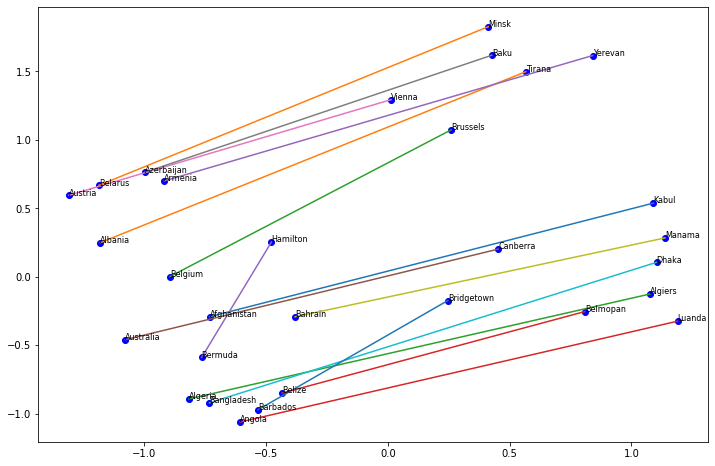

In [ ]:
plt.figure(figsize=(12,8))

#countries_num = reduced_vecs.shape[0]//2
countries_num = 15

for i in range(countries_num):
    country_idx = 2*i
    capital_idx = 2*i+1
    country_x, country_y = reduced_vecs[country_idx][0], reduced_vecs[country_idx][1]
    capital_x, capital_y = reduced_vecs[capital_idx][0], reduced_vecs[capital_idx][1]

    plt.scatter([country_x, capital_x], [country_y, capital_y], c='b')
    plt.plot([country_x, capital_x], [country_y, capital_y])

    plt.text(x=reduced_vecs[country_idx][0], y=reduced_vecs[country_idx][1],
             s=geo[country_idx], fontsize=8)
    plt.text(x=reduced_vecs[capital_idx][0], y=reduced_vecs[capital_idx][1],
             s=geo[capital_idx], fontsize=8)

## 1.4: PCA vs t-SNE on frequent words

In [ ]:
ftext.vec[0].shape

(300,)

In [ ]:
# Select words starting from the 200th to ommit stop words,
# which have at least 3 chars
top_words = [w for (i,w) in enumerate(ftext.idx2word) \
             if i > 200 and len(w) >= 3][:400]
top_inds = [ftext.word2idx[w] for w in top_words]
top_vecs = ftext.vec[top_inds]

In [ ]:
#
# TODO: make a 2D PCA projection of the selected words.
#
top_coords = PCA(n_components=2).fit_transform(top_vecs)

In [ ]:
import plotly.express as px
fig = px.scatter(x=top_coords[:, 0], y=top_coords[:, 1], text=top_words, size=np.zeros(len(top_words)))
fig.show()

In [ ]:
from sklearn.manifold import TSNE

#
# TODO: make a 2D t-SNE projection of the selected words.
# Things will cluster much nicer
#

In [ ]:
tsne = TSNE(n_components=2)
top_coords = tsne.fit_transform(top_vecs)
tsne.kl_divergence_

1.326416015625

In [ ]:
tsne = TSNE(n_components=2, method='exact', perplexity=50)
top_coords = tsne.fit_transform(top_vecs)
tsne.kl_divergence_

1.028799800765008

In [ ]:
fig = px.scatter(x=top_coords[:, 0], y=top_coords[:, 1], text=top_words, size=np.zeros(len(top_words)))
fig.show()

# Problem 2

## Report

First, I wrote an answering function using OneHotEncoder. I wasn't really satisfied,
so I quickly moved on to Word2Vec. I kept nltk usage from sample code, didn't change
upper cased words (Word2Vec is case sensitive).  
It worked better, although changing distance or normalising embeddings doesn't seem to do
anything in my case.  
After that I wrote a talker (refactored code since then to only use the talker) and had a
few conversations. It went alright. During converstations I randomly choose an answer
from top 5.  
Then I tried BERT, with averaging the results of last layer. The results were the best, although when it comes to the rest it's pretty much the same story - distance calculation and normalisation doesn't work at all.  
At last, I tried using context because I found a nice conversation to test it on, but even without decay it didn't change much at all.

In [ ]:
talker.talk()

> What's your favorite meal?
blue
> Pretty abstract
oh man i know right!?!?!
> You're really excited about this
im not mad im disappointed
> What an emotional roller coaster
exactly like that
> 


In [ ]:
talker.talk()

What's up?
just being glad this game isn't tomorrow night!
> what game?
final fantasy x hd
> is it the release?
nah like a 90~ ish fade
> So what is tomorrow?
monday
> Smartass
so basically you
> 


In [ ]:
talker.talk(best_answers=1)

> What's up?
right now? watching some movies and eating popcorn. how about you
> doin pretty good
i get crits all day but i just think its a low tier weapon...
> In a movie? How come?
it felt too short, not detailed enough
> the movie or the weapon?
the chunk of brain matter the bird is trying to get
> forget it
what?
> 


## Loading data

In [5]:
prompts = []
responses = []
err_lines = []
with open('./hackernews_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])
print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}") 
print(f"Sample fialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")

Failed to parse the following 0 lines: []
Sample fialogue pairs: 
[('Ah, yep, that was the issue.',
  'Yeah, options typically cost the company very little.'),
 ("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.',
  'Oh, I see.'),
 ("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.',
  'Whaaa?'),
 ('Quite cool.', 'It gets into a pretty philosophical area.'),
 ("If only the packaging smells, then I agree, it's not damaged.",
  'Sounds like entitlement to me.'),
 ("That's what nationalist politics always says.", 'Can you prove that?'),
 ('Misleading title.', 'Not really.'),
 ('Misleading title.',
  'It is not completely misleading to all users but enough for me to say '
  'something.'),
 ('Why the hell is this getting downvoted?',
  "Because it's clear the person he's responding to understood that "
  'relationship.'),
 ("There's a web without ads.",
  'This just came to mind when you mentioned "ad tax".'),
 ('God 

In [8]:
prompts = []
responses = []
err_lines = []
with open('./reddit_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])
print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}") 
print(f"Sample fialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")

Failed to parse the following 7 lines: [['1602 link karma', '11259 comment karma', 'damn you got almost all your karma here'], ['lol'], ['50$ skin pls'], ['omg his posting how'], ['11', 'inches to be precise :)', 'holy shit your girl has found herself a fuckin unicorn!'], ['( ) no fuk'], ['looks like you post on multiple porn subreddits']]
Sample fialogue pairs: 
[('show', 'me your moves?'),
 ('haters gonna hate', 'hate'),
 ('i think he is doing sarcasm.',
  'hahaha, you stupid twat, go and have a wank'),
 ('i can do 38 for void head :)', '39k man cant go for 38k'),
 ('brb getting hit by a car', 'did your mate, also buy you a computer?'),
 ('reason ?', 'to pay for bandwidth to troll people online.'),
 ('*155k notes...*', 'welcome to tumblr'),
 ('is it just me or is this pitched up?',
  'might be to avoid copyright issues.'),
 ('no chapter this week bud :(', '**cough*'),
 ("that's gonna come back for a block in the back",
  "but it doesn't matter. fuck this game. connor cook playing ful

## BasicEncoder and Talker

In [9]:
class BasicEncoder:
    def encode(self, sentence):
        # this is a base class!
        raise NotImplementedError

    def encode_corpus(self, sentences):
        ret = [self.encode(sentence) for sentence in tqdm(sentences)]
        return np.vstack(ret)

The code below implements a simple baseline: we encode each sentence as a sparse vector which sums word occurrences.

## OneHotEncoder

In [10]:
class OneHotEncoder(BasicEncoder):
    def __init__(self, sentences):
        self.vectorizer = sklearn.feature_extraction.text.CountVectorizer()
        self.vectorizer.fit(sentences)
    
    def encode(self, sentence):
        return self.vectorizer.transform([sentence])[0]

    def encode_corpus(self, sentences):
        # Override because sklearn already works on batches
        encodings = self.vectorizer.transform(sentences)
        # Note: this code needs to handl the scipy sparse matrix
        # which has subtle differences with numpy ndarrays
        norms = np.array((encodings.power(2)).sum(1))**0.5 + (np.exp(-100))
        encodings = encodings.multiply(1.0 / norms)
        return encodings

encoder = OneHotEncoder(prompts)
encodings = encoder.encode_corpus(prompts)

prompt = "Ultimate question: Windows or Linux?"
enc = encoder.encode(prompt)

# Deal with encodings being sparse matrices. Word2vecs will not have the pecularities
scores = (encodings @ enc.T).toarray().ravel()
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

1.0606601717798212 is in windows or in linux? : windows
1.0 p or i : yes
1.0 1 or 2? : * or 3
1.0 ......or 2 : had the same thought!
1.0 $ or ? :) : is usually usd
1.0 1 or 2? : 2 in the car this morning for me
1.0 1 or 3 : thx
1.0 question? : *small*
1.0 1 or 2? : 2, and lots of it.
1.0 windows : wtf where is the program how do i type it in, not enough info i am getting


In [155]:
# TODO: build a simple dialogue system using these k-neares neighbor matches, 
# perform a few test conversations

In [160]:
def answer_prompt(prompt, encoder, encodings, prompts, responses, provide_prompt=False):
    enc = encoder.encode(prompt)
    scores = (encodings @ enc.T).toarray().ravel()
    top_idx = scores.argsort()[-5:]
    idx = np.random.choice(top_idx)
    if provide_prompt:
        return prompts[idx], responses[idx]
    else:
        return responses[idx]

In [161]:
answer_prompt('Ultimate question: Windows or Linux', encoder, encodings, prompts, responses, provide_prompt=True)

('p or i', 'yes')

In [165]:
my_prompts = ["What's your favourite meal?",
              "Where are you from?",
              "How many legs do you have?",
              "Do you like pizza?"]

for my_prompt in my_prompts:
    print(answer_prompt(my_prompt, encoder, encodings, prompts, responses, provide_prompt=True))

("what's your question?", 'price check for binding of isaac: rebirth')
('where are you from?', 'finland')
('how many peaches do you have', 'millions')
('(   ) do you?', ';] grab a goat.')


## Talker

In [11]:
class Talker():
    def __init__(self, encoder, prompts, responses, encodings=None, normalise=True):
        self.encoder = encoder
        if encodings is not None:
            self.encodings = encodings
        else:
            self.encodings = encoder.encode_corpus(prompts)
        if normalise:
            self.encodings = (self.encodings / (np.sqrt(np.sum(self.encodings**2, axis=1)).reshape(-1, 1) + np.exp(-100)))
        self.prompts = prompts
        self.responses = responses
        self.normalise = normalise
        self.context = np.zeros(self.encodings.shape[1])


    def talk(self, **kwargs):
        self.context = np.zeros(self.encodings.shape[1])
        prompt = input('> ')
        while(prompt != ''):
            print(self.answer_prompt(prompt, **kwargs))
            prompt = input('> ')


    def answer_prompt(self, prompt, dist='euclid', best_answers = 5,
                       provide_prompt=False, use_context=False, context_decay = 0.5):
        if dist == 'cosine' and not self.normalise:
            raise ValueError("Can't use cosine similarity without normalisation")

        enc = self.encoder.encode(prompt)

        if use_context:
            self.context *= (1 - context_decay)
            enc += self.context

        if self.normalise:
            enc = enc / (np.sqrt(np.sum(enc**2)) + np.exp(-100))

        scores = None
        if dist == 'euclid':
            scores = -((self.encodings - enc)**2).sum(axis=1)
        elif dist == 'cosine':
            scores = enc.dot(self.encodings.T)
        else:
            raise ValueError("Unknown distance")

        top_idx = scores.argsort()[-best_answers:]
        idx = np.random.choice(top_idx)

        if use_context:
            self.context = enc + self.encodings[idx]

        if provide_prompt:
            return self.prompts[idx], self.responses[idx]
        else:
            return self.responses[idx]


## Word2VecEncoder

In [167]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

In [168]:
def load_vecs_npy(base_path):
    """Load small embeddings in .npy format."""
    vec = np.load(base_path + '.npy')
    idx2word = [l.strip() for l in codecs.open(
                      base_path + '.txt', 'r', 'utf-8')]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)

In [169]:
# Load top 200k word embeddings: Word2vec and FastText
word2vec = load_vecs_npy('word2vec/word2vec_GoogleNews_200k')
ftext = load_vecs_npy('word2vec/fasttext_wikien_200k')

In [177]:
class Word2VecEncoder(BasicEncoder):
    def __init__(self, vecs):
        self._vecs = vecs

    def _get_vec(self, word):
        # Find the vector for word, or use a suitbale out-of-vocabulary vector
        # For extra points try backing off to a lowercased dictionary
        idx = self._vecs.word2idx.get(word, None)
        if idx is None:
            return 0
        return self._vecs.vec[idx]

    def encode(self, sentence):
        ret = np.zeros(self._vecs.vec.shape[1])
        for token in nltk.tokenize.word_tokenize(sentence):
            word_vec = self._get_vec(token)
            ret += word_vec
        ret /= (np.linalg.norm(ret) + 1e-5)
        return ret

encoder = Word2VecEncoder(word2vec)
encodings = encoder.encode_corpus(prompts)

In [216]:
talker = Talker(encoder, prompts, responses, encodings=encodings)

In [200]:
talker.answer_prompt("How's it going?", provide_prompt=True)

('how would you know', 'im a psychologist')

In [201]:
talker.answer_prompt('Ultimate question: Windows or Linux')

'doing that right now :)'

### Distance and normalisation

In [217]:
my_prompts = ["What's your favorite meal?",
              "Where are you from?",
              "How many legs do you have?",
              "Do you like pizza?"]

In [218]:
for my_prompt in my_prompts:
    print(talker.answer_prompt(my_prompt, provide_prompt=True, best_answers=1))

("what's your favorite dessert", 'ice cream or like cherry pie')
('where are you from?', 'from romania')
('how many do you have?', "4, but they need to be gifted so you can't have it already")
("do you still want pizza because i'll buy you pizza", "pm'd you!")


In [219]:
for my_prompt in my_prompts:
    print(talker.answer_prompt(my_prompt, provide_prompt=True, best_answers=1, dist='cosine'))

("what's your favorite dessert", 'ice cream or like cherry pie')
('where are you from?', 'from romania')
('how many do you have?', "4, but they need to be gifted so you can't have it already")
("do you still want pizza because i'll buy you pizza", "pm'd you!")


In [220]:
talker = Talker(encoder, prompts, responses, encodings=encodings, normalise=False)
for my_prompt in my_prompts:
    print(talker.answer_prompt(my_prompt, provide_prompt=True, best_answers=1))

("what's your favorite dessert", 'ice cream or like cherry pie')
('where are you from?', 'from romania')
('how many do you have?', "4, but they need to be gifted so you can't have it already")
("do you still want pizza because i'll buy you pizza", "pm'd you!")


### Sample conversations

In [ ]:
talker.talk()

What's your favorite meal?
askwomen or gonewild to be honest
These are subreddits
can confirm
Fair enough
it is a repost though
General reposti
yeah,he fits the profile 100%



In [207]:
talker.talk()

> What's your favorite meal?
blue
> Pretty abstract
oh man i know right!?!?!
> You're really excited about this
im not mad im disappointed
> What an emotional roller coaster
exactly like that
> 


## BERT

In [12]:
class BertEncoder(BasicEncoder):
    def __init__(self):
        self._model = BertModel.from_pretrained('bert-base-uncased').cuda()
        self._model.eval()
        self._tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def encode(self, sentence):
        tokens = self._tokenizer(sentence)['input_ids']
        tokens = torch.tensor([tokens]).cuda()

        with torch.no_grad():
            last_layer = self._model(tokens)[0][0]

        return np.array(last_layer.mean(dim=0).cpu())

    # Batch computing - how to deal with padding? Always pad to the longest sentence?

    # def encode_corpus(self, sentences):
    #     # Side effect of padding - we differentiate between long and short sentences
    #     tokens = self._tokenizer(sentences, padding=True)['input_ids']
    #     tokens = torch.tensor(tokens)

    #     with torch.no_grad():
    #         last_layers = self._model(tokens)[0]

    #     return last_layers.mean(dim=1)

encoder = BertEncoder()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
encodings = encoder.encode_corpus(prompts)

In [14]:
talker = Talker(encoder, prompts, responses, encodings=encodings)

In [15]:
talker.answer_prompt('Ultimate question: Windows or Linux')

'no ubuntu is better'

### Distance and normalisation

In [18]:
my_prompts = ["What's your favourite meal?",
              "Where are you from?",
              "How many legs do you have?",
              "Do you like pizza?"]

In [19]:
for my_prompt in my_prompts:
    print(talker.answer_prompt(my_prompt, provide_prompt=True, best_answers=1))

("what's your favorite drink?", 'oops')
('where are you from ?', 'americatheland oftheannoyance')
('how much agility do you have?', 'damn!! you beat me!!')
('do you like cheese', 'i do i do')


In [20]:
for my_prompt in my_prompts:
    print(talker.answer_prompt(my_prompt, provide_prompt=True, best_answers=1, dist='cosine'))

("what's your favorite drink?", 'oops')
('where are you from ?', 'americatheland oftheannoyance')
('how much agility do you have?', 'damn!! you beat me!!')
('do you like cheese', 'i do i do')


In [21]:
talker = Talker(encoder, prompts, responses, encodings=encodings, normalise=False)
for my_prompt in my_prompts:
    print(talker.answer_prompt(my_prompt, provide_prompt=True, best_answers=1))

("what's your favorite drink?", 'oops')
('where are you from?', 'from romania')
('how much agility do you have?', 'damn!! you beat me!!')
('do you like cheese', 'i do i do')


### Some sample converstations

In [94]:
talker = Talker(encoder, prompts, responses, encodings=encodings)

In [61]:
talker.talk()

What's up?
just being glad this game isn't tomorrow night!
> what game?
final fantasy x hd
> is it the release?
nah like a 90~ ish fade
> So what is tomorrow?
monday
> Smartass
so basically you
> 


In [62]:
talker.talk()

Got some change?
have it 5 now
> 5 what?
keys :))
> what do you use those keys for?
"74% of statistics are made up"
> you're talking rubbish
you called me a comedian right? am i me me funny?
> no, not really
its a night with a purple handle, whats not to like
> 


### Using context

In [ ]:
talker.talk(best_answers=1)

> What's up?
right now? watching some movies and eating popcorn. how about you
> doin pretty good
i get crits all day but i just think its a low tier weapon...
> In a movie? How come?
it felt too short, not detailed enough
> the movie or the weapon?
the chunk of brain matter the bird is trying to get
> forget it
what?
> 


In [ ]:
talker.talk(best_answers=1, use_context=True, context_decay=0)

> What's up?
right now? watching some movies and eating popcorn. how about you
> doin pretty good
i get crits all day but i just think its a low tier weapon...
> In a movie? How come?
it felt too short, not detailed enough
> the movie or the weapon?
the chunk of brain matter the bird is trying to get
> forget it
what?
> 


In [ ]:
talker.talk(best_answers=1, use_context=True, context_decay=0.5)

> What's up?
right now? watching some movies and eating popcorn. how about you
> doin pretty good
i get crits all day but i just think its a low tier weapon...
> In a movie? How come?
it felt too short, not detailed enough
> the movie or the weapon?
the chunk of brain matter the bird is trying to get
> forget it
stop what?
> 


In [22]:
talker = Talker(encoder, prompts, responses, encodings=encodings, normalise=False)
talker.talk(best_answers=1, use_context=True, context_decay=0.5)

> What's up?
right now? watching some movies and eating popcorn. how about you
> doin pretty good
right now? watching some movies and eating popcorn. how about you
> cool
right now? watching some movies and eating popcorn. how about you
> 


In [24]:
talker.talk(best_answers=1, use_context=True, context_decay=0.9)

> What's up?
right now? watching some movies and eating popcorn. how about you
> doin pretty good
i get crits all day but i just think its a low tier weapon...
> 
